In [ ]:
import numpy as np
import cv2

In [ ]:
# Load an color image in grayscale
img = cv2.imread('image.jpg',0)

In [ ]:
cv2.imshow('image',img)#이미지를 창에 띄운다
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)#창이 크기조절이 가능한 일반 창이 된다.
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
cv2.imwrite('WriteTest.png',img)

True

In [2]:
#창에서 무슨 버튼을 누르느냐에 따라 저장이 되거나 창이 닫힌다. 키매핑
import numpy as np
import cv2
img = cv2.imread('image.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27: # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('SumItUpTest.png',img)
    cv2.destroyAllWindows()


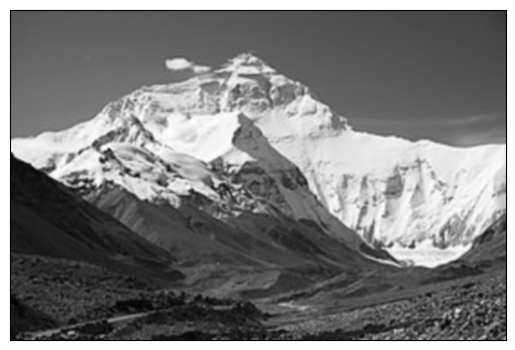

In [7]:
#이미지를 결과창에 표시한다.
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('image.jpg',0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [ ]:
#캠에 액세스해서 창 띄우기
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()


In [ ]:
#영상 실행
import numpy as np
import cv2
cap = cv2.VideoCapture('video.avi')
while(cap.isOpened()):
    ret, frame = cap.read()
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [ ]:
#캠에서 찍힌 영상 저장
import numpy as np
import cv2
cap = cv2.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# Release everything if job is finished
cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)#직선
img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)#사각형
img = cv2.circle(img,(447,63), 63, (0,0,255), -1)#원형
img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)#반원

#폴리곤
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))

#글자 입력(opneCV)
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)




In [ ]:
from matplotlib import pyplot as plt
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

In [5]:
#마우스 클릭시 원이 생성
import cv2
import numpy as np
# mouse callback function
def draw_circle(event,x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img,(x,y),100,(255,0,0),-1)
        # Create a black image, a window and bind the function to window
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    if cv2.waitKey(20) & 0xFF == 27:
        break
cv2.destroyAllWindows()


In [17]:
#마우스 드래그시 드래그에 따라 사각형 그리기
import cv2
import numpy as np
drawing = False # true if mouse is pressed
mode = True # if True, draw rectangle. Press 'm' to toggle to curve
ix,iy = -1,-1
# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix,iy,drawing,mode
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix,iy = x,y
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            if mode == True:
                cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)#ix,iy 기존 좌표 x,y 마우스 위치
            else:
                cv2.circle(img,(x,y),5,(0,0,255),-1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode == True:
            cv2.rectangle(img,(ix,iy),(x,y),(0,255,0),-1)
        else:
            cv2.circle(img,(x,y),5,(0,0,255),-1)
img = np.zeros((512,512,3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == ord('m'):
        mode = not mode
    elif k == 27:
        break
cv2.destroyAllWindows()

In [15]:
#트랙 바 달기
import cv2
import numpy as np
def nothing(x):
    pass
# Create a black image, a window
img = np.zeros((300,512,3), np.uint8)
cv2.namedWindow('image')
# create trackbars for color change
cv2.createTrackbar('R','image',0,255,nothing)
cv2.createTrackbar('G','image',0,255,nothing)
cv2.createTrackbar('B','image',0,255,nothing)
cv2.createTrackbar('GG','image',0,255,nothing)
# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image',0,1,nothing)
while(1):
    cv2.imshow('image',img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R','image')
    g = cv2.getTrackbarPos('G','image')
    b = cv2.getTrackbarPos('B','image')
    gg= cv2.getTrackbarPos('GG','image')
    s = cv2.getTrackbarPos(switch,'image')
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b,g,r]
cv2.destroyAllWindows()